This notebook assumes you are using sims_maf version >= 1.0, and have 'setup sims_maf' in your shell. 

#Demonstrate the proper motion and parallax metrics.#

For both of these metrics, visits in all bands are used (unless restricted by the user via a sqlconstraint). 
The astrometric error for each visit, for a star of the specified brightness and spectral type, is estimated from the magnitude of the star and the m5 limit of each visit (recorded by opsim). 
The parallax error is estimated by assuming that the proper motion is perfectly fit (or zero); the proper motion error is likewise estimated by assuming the parallax is perfectly fit (or zero). 
In both cases, the effects of refraction is not currently included in the astrometric error. 

Here is a link to the [code](https://github.com/lsst/sims_maf/blob/master/python/lsst/sims/maf/metrics/calibrationMetrics.py) for the proper motion and parallax metrics. 
The 'ra_pi_amp' and 'dec_pi_amp' columns referred to in the parallax metric are stacker columns which calculate the parallax amplitude (in ra and dec) for each visit, using this [code](https://github.com/lsst/sims_maf/blob/master/python/lsst/sims/maf/stackers/generalStackers.py). 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [3]:
# Set up the database connection
opsdb = db.OpsimDatabase('sqlite:///enigma_1189_sqlite.db')
outDir = 'astrometry_test'
resultsDb = db.ResultsDb(outDir=outDir)

Define our basic sqlconstraint (we'll only look at the first three years here) and define the metrics and slicer. 

In [3]:
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64)
metricList = []
metricList.append(metrics.ParallaxMetric())
metricList.append(metrics.ParallaxMetric(metricName='properMotion Normed', normalize=True))
metricList.append(metrics.ProperMotionMetric())
metricList.append(metrics.ProperMotionMetric(metricName='properMotion Normed', normalize=True))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Add a summary metric to compute for each of the metricBundles. 

In [4]:
summaryList = [metrics.MedianMetric()]

In [5]:
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=summaryList))

In [6]:
bundleDict = metricBundles.makeBundleDict(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 1095
Found 742544 visits
Running:  ['opsim_properMotion_Normed_night_lt_1095_HEAL', 'opsim_properMotion_night_lt_1095_HEAL', 'opsim_parallax_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression 'night < 1095' should be explicitly declared as text('night < 1095') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


Plotting.
monopole: 0.139547  dipole: lon: 68.0715, lat: 37.9006, amp: 0.0370472
monopole: 1.70233  dipole: lon: -91.9968, lat: -50.7288, amp: 1.79344
monopole: 1.27287  dipole: lon: -93.3213, lat: 69.5409, amp: 0.333683
Plotting complete.


Optimal bin calculation tried to make 993 bins, returning 200


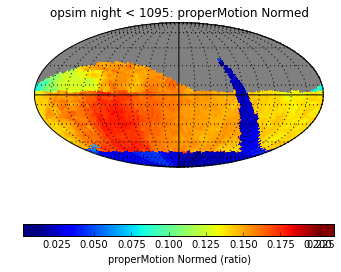

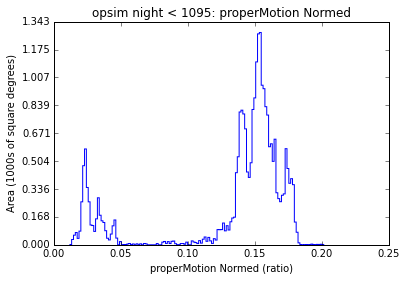

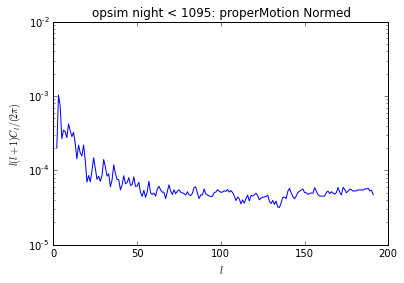

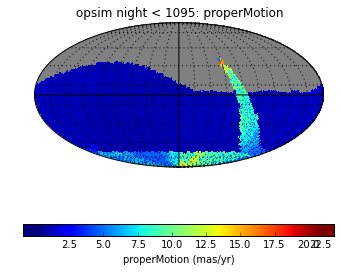

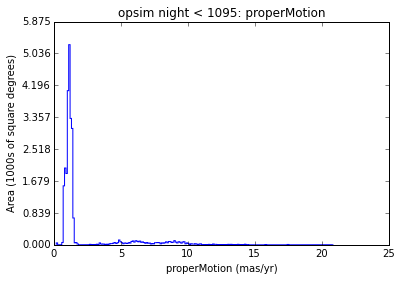

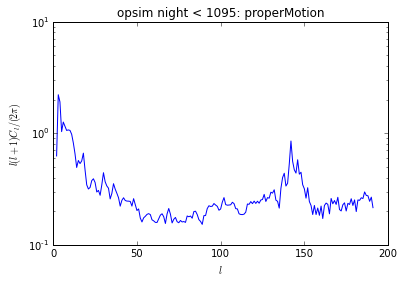

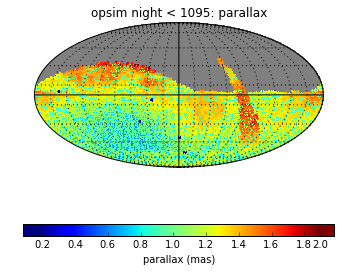

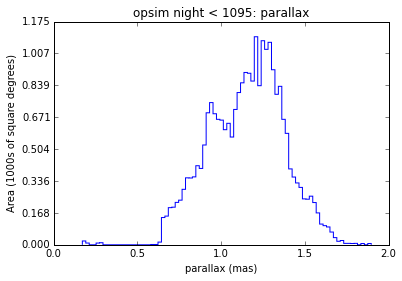

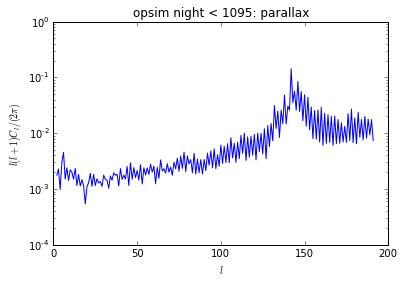

In [7]:
bgroup.plotAll(closefigs=False)

By default, the proper motion and parallax metrics assume a flat SED with an r-band magnitude of 20, however this can be specified by the user when setting up the metric.

In [8]:
rmags = {'faint':25, 'bright':18}
specTypes = ['B', 'K']
metricList = []
for mag in rmags:
    for specType in specTypes:
        metricList.append(metrics.ParallaxMetric(rmag=rmags[mag], SedTemplate=specType, 
                                                 metricName='parallax_'+mag+'_'+specType))
        metricList.append(metrics.ProperMotionMetric(rmag=rmags[mag], SedTemplate=specType, 
                                                     metricName='properMotion'+mag+'_'+specType))

In [9]:
bundlesSpec = []
for metric in metricList:
    bundlesSpec.append(metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=summaryList))
bundlesSpec = metricBundles.makeBundleDict(bundlesSpec)

In [10]:
bgroup = metricBundles.MetricBundleGroup(bundlesSpec, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint night < 1095
Found 742544 visits
Running:  ['opsim_parallax_faint_B_night_lt_1095_HEAL', 'opsim_properMotionbright_K_night_lt_1095_HEAL', 'opsim_properMotionfaint_B_night_lt_1095_HEAL', 'opsim_properMotionbright_B_night_lt_1095_HEAL', 'opsim_parallax_faint_K_night_lt_1095_HEAL', 'opsim_properMotionfaint_K_night_lt_1095_HEAL', 'opsim_parallax_bright_K_night_lt_1095_HEAL', 'opsim_parallax_bright_B_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Querying database with constraint night < 1095
Found 742544 visits
Running:  [0, 1, 2, 3, 4, 5, 6, 7]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 1.02423  dipole: lon: -86.0123, lat: 68.5879, amp: 0.259917
monopole: 1.27528  dipole: lon: -90.7242, lat: -57.8646, amp: 1.50755
monopole: 0.969589  dipole: lon: -83.625, lat: 65.3748, amp: 0.24395

Optimal bin calculation tried to make 1154 bins, returning 200
Optimal bin calculation tried to make 1233 bins, returning 200



monopole: 1.23862  dipole: lon: -88.2347, lat: -56.1551, amp: 1.47753
monopole: 30.1251  dipole: lon: -66.0523, lat: 86.4984, amp: 11.8635
monopole: 40.4938  dipole: lon: -93.5798, lat: -46.2418, amp: 37.4439

Optimal bin calculation tried to make 923 bins, returning 200
/Users/lynnej/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



monopole: 41.528  dipole: lon: -100.049, lat: 76.5643, amp: 10.2815
monopole: 60.28  dipole: lon: -94.7517, lat: -58.5223, amp: 85.4219
Plotting complete.


Optimal bin calculation tried to make 999 bins, returning 200


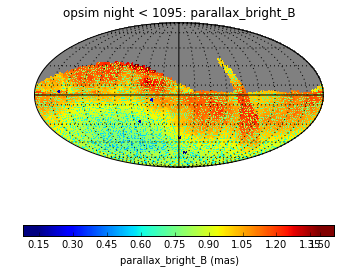

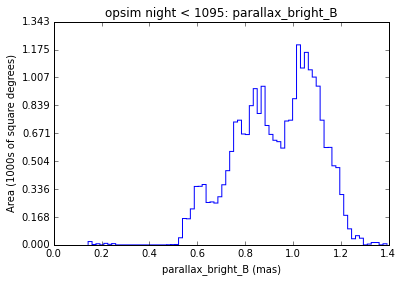

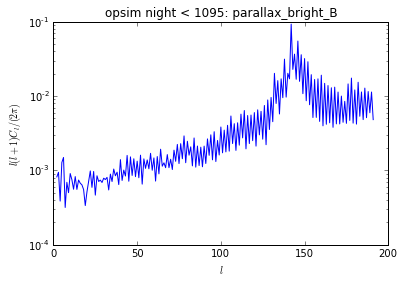

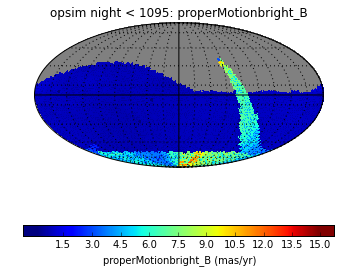

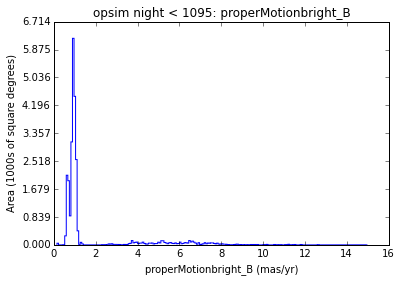

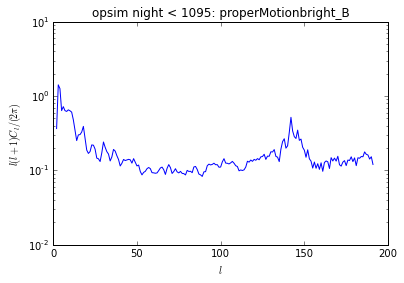

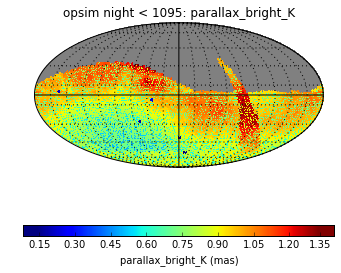

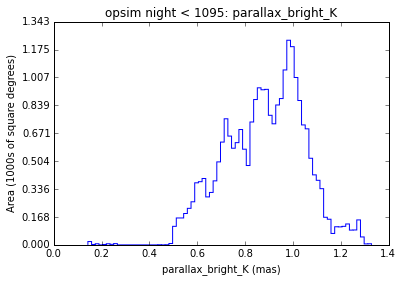

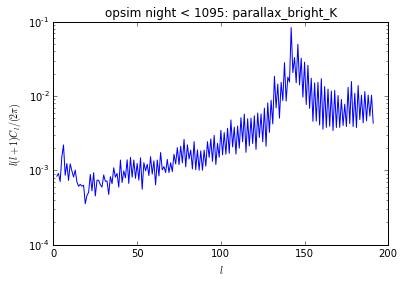

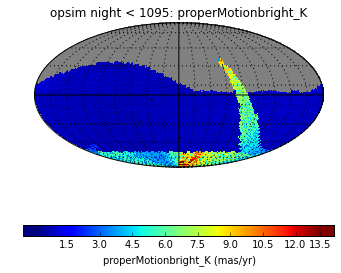

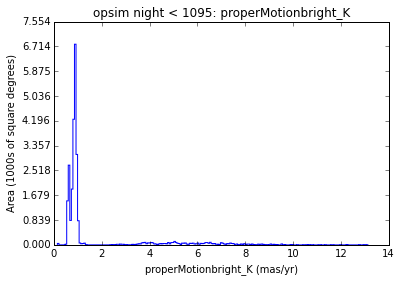

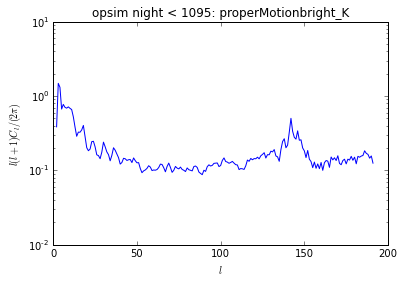

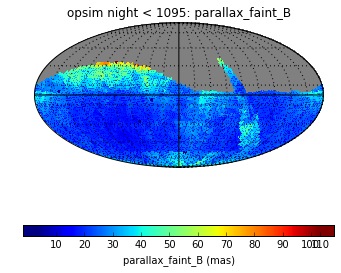

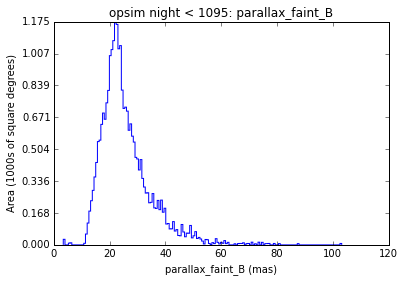

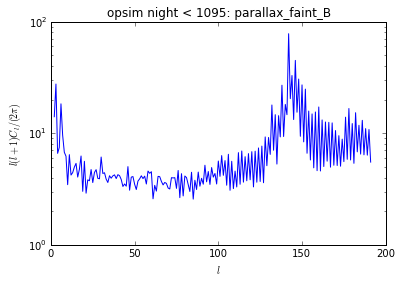

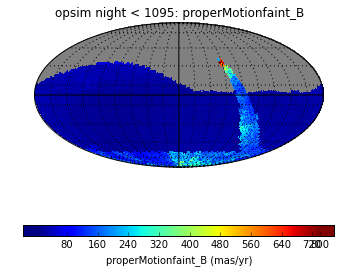

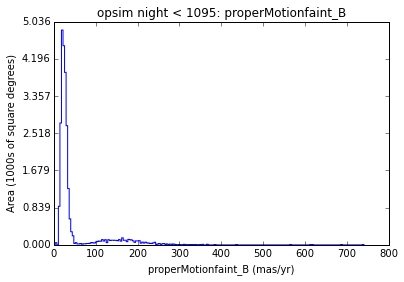

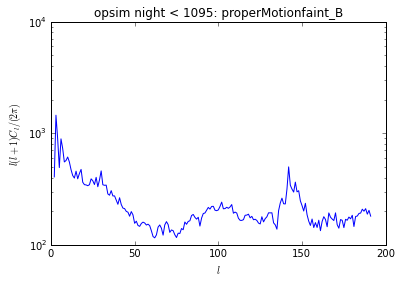

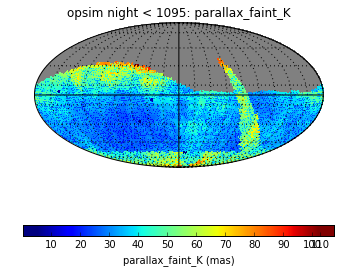

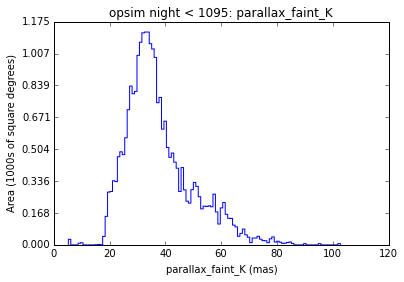

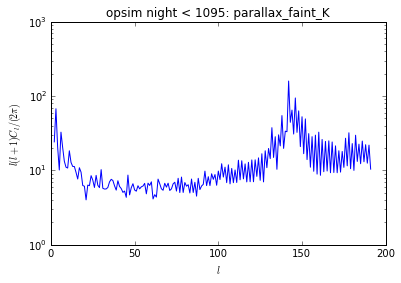

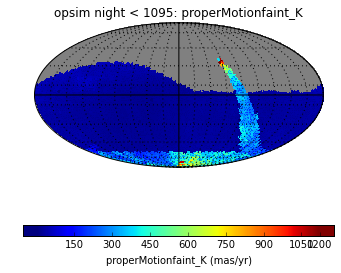

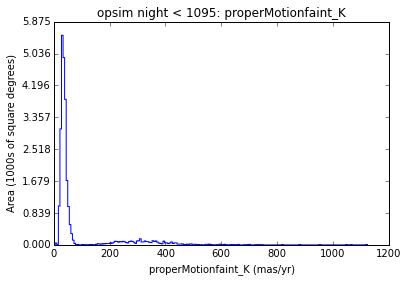

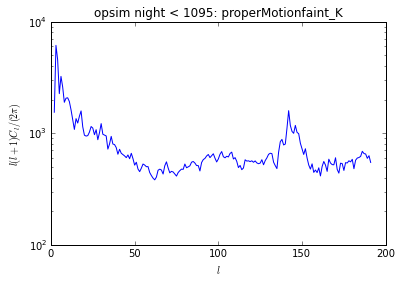

In [12]:
bgroup.plotAll(closefigs=False)

In [13]:
print 'Flat SED:'
for bundle in bundles.values():
    print bundle.metric.name, bundle.summaryValues
print 'B and K stars:'
for bundle in bundlesSpec.values():
    print bundle.metric.name, bundle.summaryValues

Flat SED:
parallax {'Median': 1.1709982315715792}
properMotion Normed {'Median': 0.75099719139143362}
properMotion {'Median': 1.1772760032822704}
properMotion Normed {'Median': 0.15120257799369402}
B and K stars:
parallax_bright_B {'Median': 0.94873300437289387}
properMotionbright_B {'Median': 0.94466715414922886}
parallax_bright_K {'Median': 0.89403080548020508}
properMotionbright_K {'Median': 0.87518803051268779}
parallax_faint_B {'Median': 23.753371672753509}
properMotionfaint_B {'Median': 25.532009292441671}
parallax_faint_K {'Median': 35.073299653611699}
properMotionfaint_K {'Median': 36.75370613998674}
